# Word Embeddings

Word embeddings are vector generating techniques from text.

## Word2vec: 
Google's framework to train word embeddings. It uses all the words in a corpus to predicting narby words. There are two types:

1. Skip Grams
predict the probabilities of a word given the context of word or words.

2. Continuous Bag of Words (CBoW)



In [7]:
sentences = [['I', 'love', 'nlp'],
                  ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                  ['nlp', 'is', 'future'],
                  ['nlp', 'saves', 'time', 'and', 'solves','lot',
                   'of', 'industry', 'problems'],
                  ['nlp', 'uses', 'machine', 'learning']]

In [9]:
sentences[:2]

[['I', 'love', 'nlp'], ['I', 'will', 'learn', 'nlp', 'in', '2', 'months']]

In [10]:
#!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [11]:
# training the model
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['nlp'])

Word2Vec(vocab=21, size=50, alpha=0.025)
[-0.00643934 -0.00275135  0.0058854   0.0056121  -0.005865   -0.00674737
  0.00635513  0.00559893 -0.00742416 -0.00245668 -0.00385797 -0.00907853
 -0.00352373 -0.00049328  0.00922769  0.00705653  0.00930254 -0.00452186
 -0.00183919  0.00164825 -0.00749792 -0.00934361  0.00463586 -0.00828358
  0.00728654  0.00485502  0.00737902 -0.00058594  0.00860407 -0.00780729
 -0.00601696  0.00135827 -0.0082927  -0.00724523  0.00358871  0.00509219
 -0.00234677  0.00427071  0.00462534 -0.00096307 -0.00326444 -0.00359961
  0.00647979  0.00766388 -0.00335207  0.00847467  0.00851938 -0.0085306
  0.00743326  0.00742231]


/home/sushil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [14]:
# access vector for another one word
#print(skipgram['deep'])

In [15]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')

In [16]:
# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/sushil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


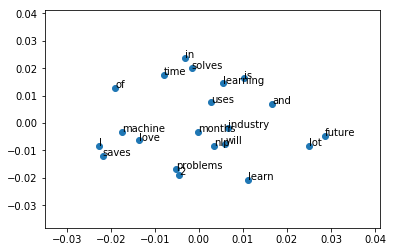

In [17]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# CBoW

Word2Vec(vocab=21, size=50, alpha=0.025)
[-0.00643934 -0.00275135  0.0058854   0.0056121  -0.005865   -0.00674737
  0.00635513  0.00559893 -0.00742416 -0.00245668 -0.00385797 -0.00907853
 -0.00352373 -0.00049328  0.00922769  0.00705653  0.00930254 -0.00452186
 -0.00183919  0.00164825 -0.00749792 -0.00934361  0.00463586 -0.00828358
  0.00728654  0.00485502  0.00737902 -0.00058594  0.00860407 -0.00780729
 -0.00601696  0.00135827 -0.0082927  -0.00724523  0.00358871  0.00509219
 -0.00234677  0.00427071  0.00462534 -0.00096307 -0.00326444 -0.00359961
  0.00647979  0.00766388 -0.00335207  0.00847467  0.00851938 -0.0085306
  0.00743326  0.00742231]


/home/sushil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/sushil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


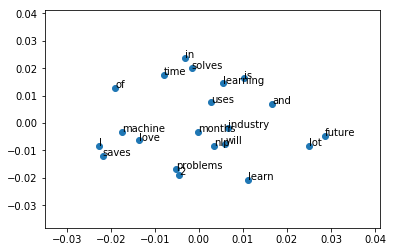

In [19]:
cbow = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(cbow)
# access vector for one word
print(cbow['nlp'])
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T – SNE plot
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()